Problem tanımı ve amaç: Bu veri seti UK’de 2000-2016 yıllarına ait 1.6 milyondan fazla trafik kazası verilerini içermektedir. Bu veri seti aracılığıyla aşağıdaki gibi sorulara yanıt aranmaktadır.

Trafik akışının değişmesi kazaları nasıl etkiler?
Kaza oranlarını ne artırır?
Zaman içinde kaza oranlarını tahmin edebilir miyiz?
Kırsal ve kentsel alanlar nasıl farklılaştı?


In [67]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd 

In [68]:
df_acc_05_07 = pd.read_csv('accidents_2005_to_2007.csv', low_memory = False)
df_acc_09_11 = pd.read_csv('accidents_2009_to_2011.csv', low_memory = False)
df_acc_12_14 = pd.read_csv('accidents_2012_to_2014.csv', low_memory = False)
df_UK = pd.read_csv('ukTrafficAADF.csv', low_memory = False)

In [69]:
df_UK.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [70]:
all_accidents = pd.concat([df_acc_05_07, df_acc_09_11, df_acc_12_14], axis=0)
all_accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
464696,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


KAZA ORANINI NE ARTTIRIR 

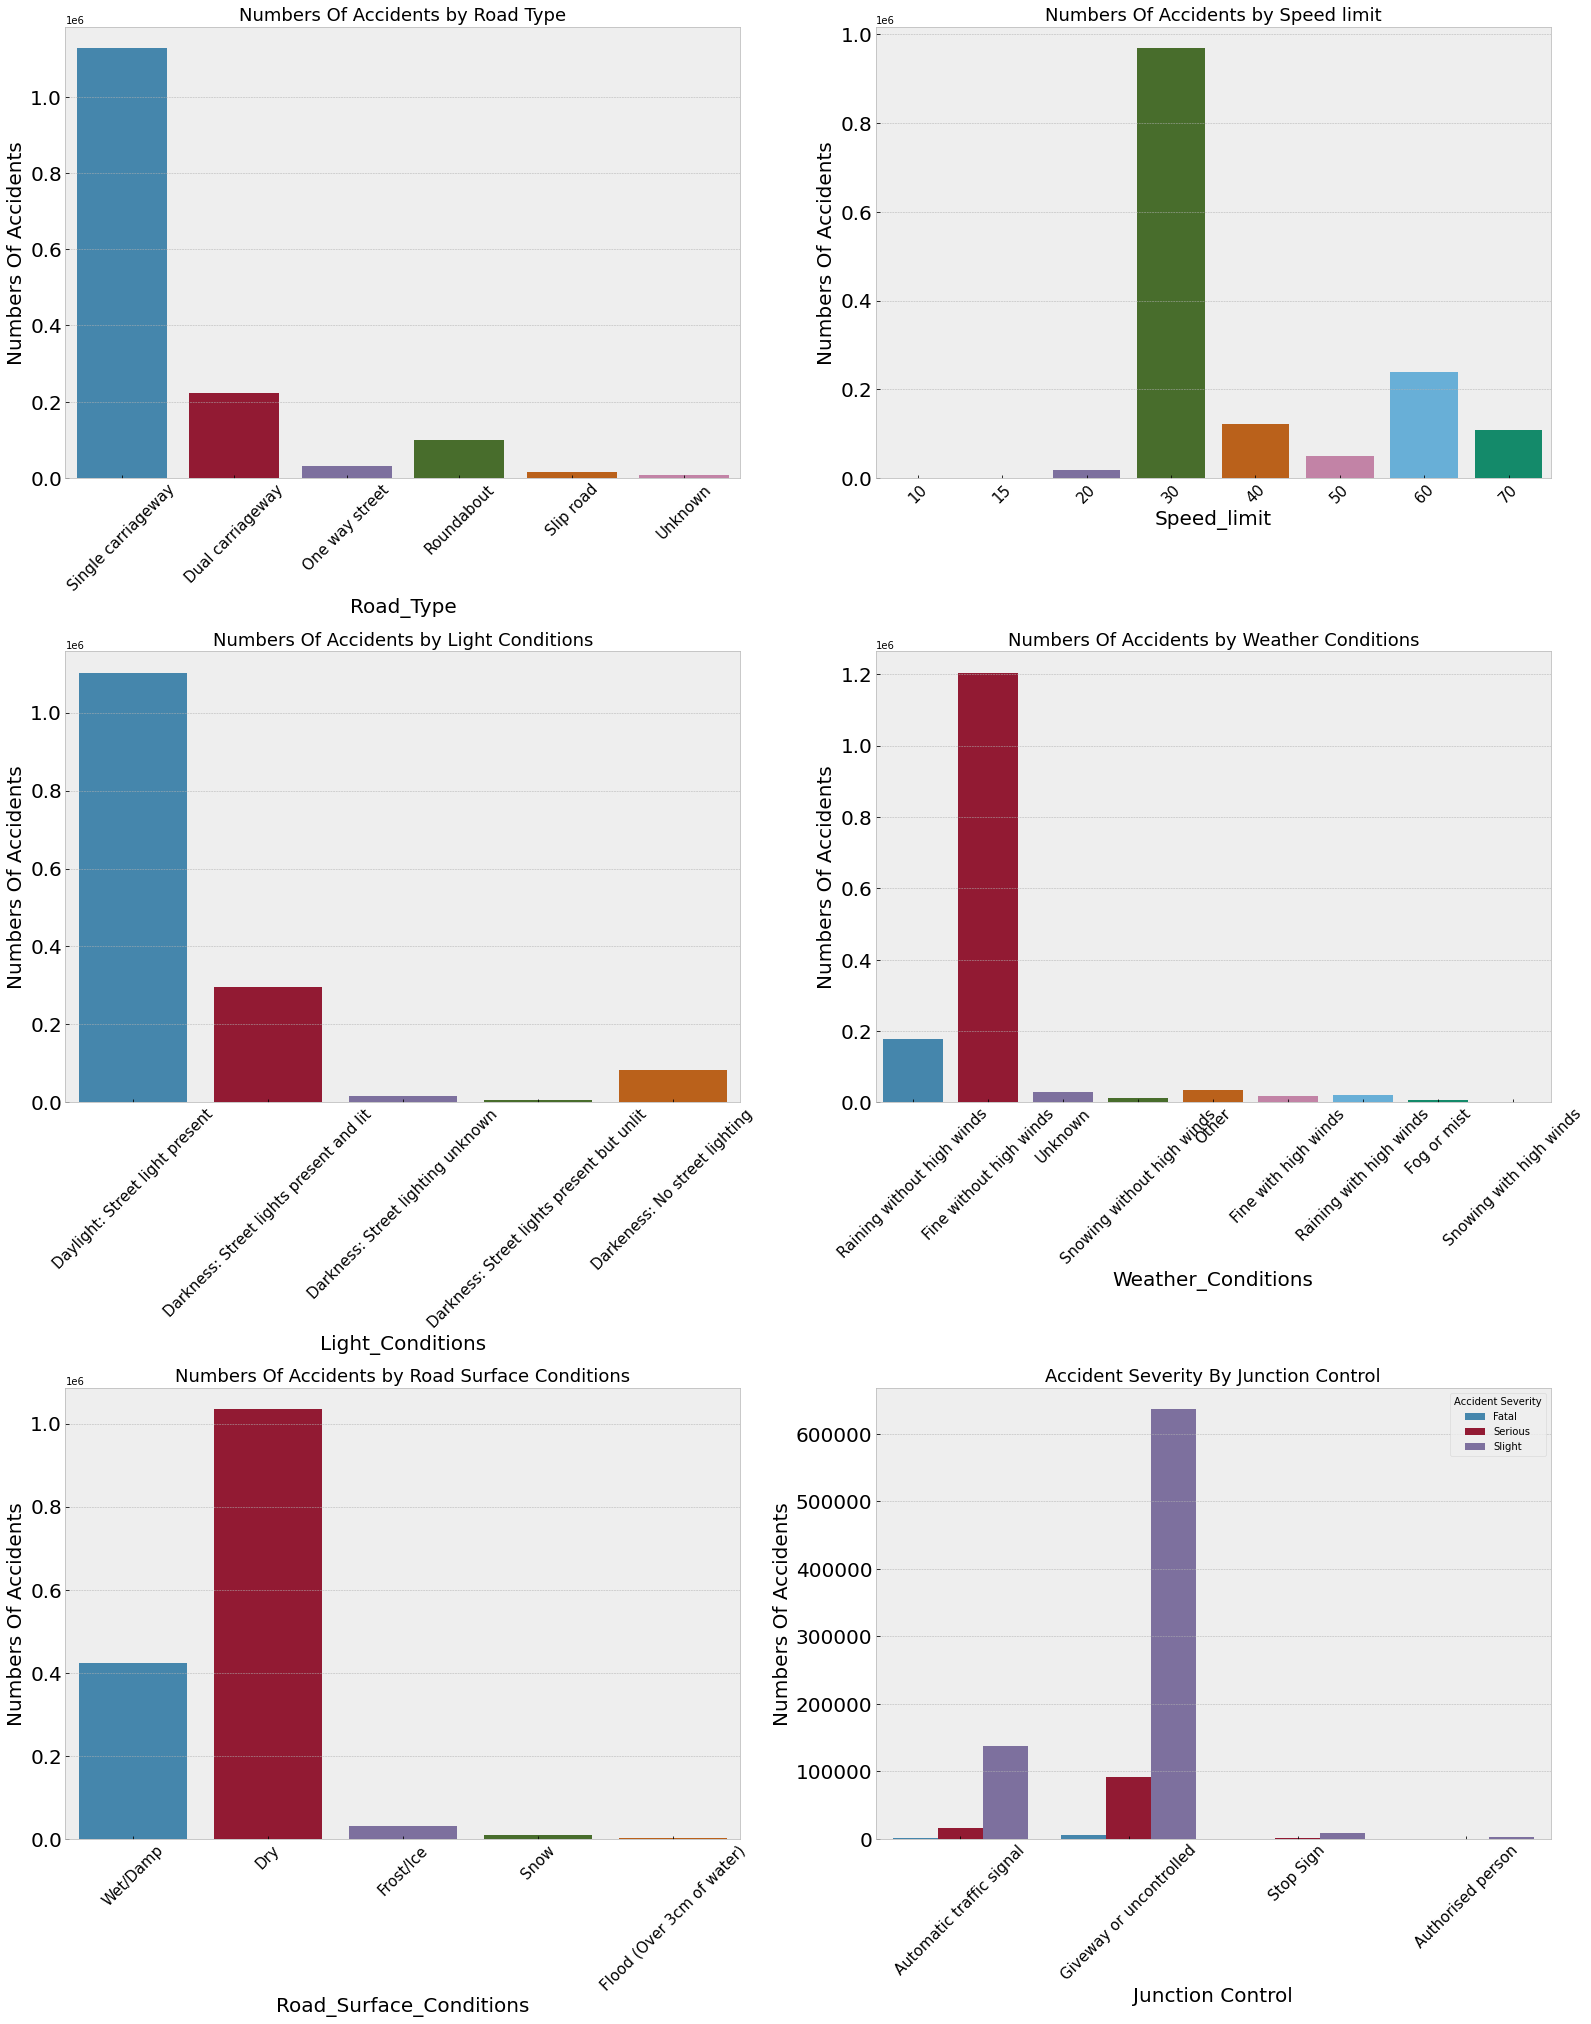

In [71]:


f, axs = plt.subplots(3,2, figsize = (22,28), constrained_layout = True)
#Road_Type:
ax = sns.countplot(x="Road_Type",data=all_accidents , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45, labelsize=15)
ax.tick_params(axis = 'y',labelsize=20)
ax.set_xlabel("Road_Type",size=20)
ax.set_ylabel("Numbers Of Accidents",size=20)
axs[0,0].title.set_text('Numbers Of Accidents by Road Type')
axs[0,0].title.set_size(18)

#Speed_limit:
ax = sns.countplot(x="Speed_limit",data=all_accidents, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45, labelsize=15)
ax.tick_params(axis = 'y',labelsize=20)
ax.set_xlabel("Speed_limit",size=20)
ax.set_ylabel("Numbers Of Accidents",size=20)
axs[0,1].title.set_text('Numbers Of Accidents by Speed limit')
axs[0,1].title.set_size(18)

#Light_Conditions:
ax = sns.countplot(x="Light_Conditions",data=all_accidents , ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45, labelsize=15)
ax.tick_params(axis = 'y',labelsize=20)
ax.set_xlabel("Light_Conditions",size=20)
ax.set_ylabel("Numbers Of Accidents",size=20)
axs[1,0].title.set_text('Numbers Of Accidents by Light Conditions')
axs[1,0].title.set_size(18)

#Weather_Conditions:
ax = sns.countplot(x="Weather_Conditions",data=all_accidents , ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45, labelsize=15)
ax.tick_params(axis = 'y',labelsize=20)
ax.set_xlabel("Weather_Conditions",size=20)
ax.set_ylabel("Numbers Of Accidents",size=20)
axs[1,1].title.set_text('Numbers Of Accidents by Weather Conditions')
axs[1,1].title.set_size(18)


#Road_Surface_Conditions:
ax = sns.countplot(x="Road_Surface_Conditions",data=all_accidents , ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45, labelsize=15)
ax.tick_params(axis = 'y',labelsize=20)
ax.set_xlabel("Road_Surface_Conditions",size=20)
ax.set_ylabel("Numbers Of Accidents",size=20)
axs[2,0].title.set_text('Numbers Of Accidents by Road Surface Conditions')
axs[2,0].title.set_size(18)

#Junction Control:
ax = sns.countplot(data=all_accidents,x="Junction_Control",hue="Accident_Severity", ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45, labelsize=15)
ax.tick_params(axis = 'y',labelsize=20)
axs[2,1].title.set_text('Accident Severity By Junction Control')
axs[2,1].title.set_size(18)
ax.set_xlabel("Junction Control",size=20)
ax.set_ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])


KIRSAL VE KENTSEL ALANLAR NASIL FARKLILAŞTI

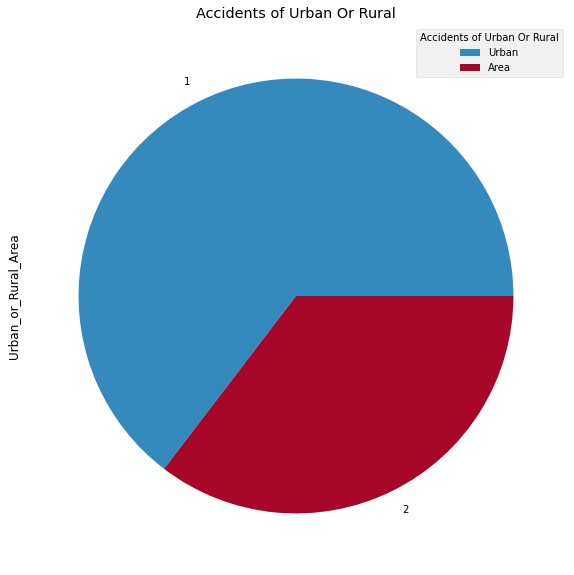

In [72]:
area = pd.DataFrame(all_accidents["Urban_or_Rural_Area"].value_counts())
area = area.drop([3])
area.plot.pie(y="Urban_or_Rural_Area",figsize=[10,10])
plt.title("Accidents of Urban Or Rural")
plt.legend(title="Accidents of Urban Or Rural",labels=["Urban","Area"])

YILLARA GÖRE KAZA MİKTARLARI

Text(0, 0.5, 'Number of Accidents')

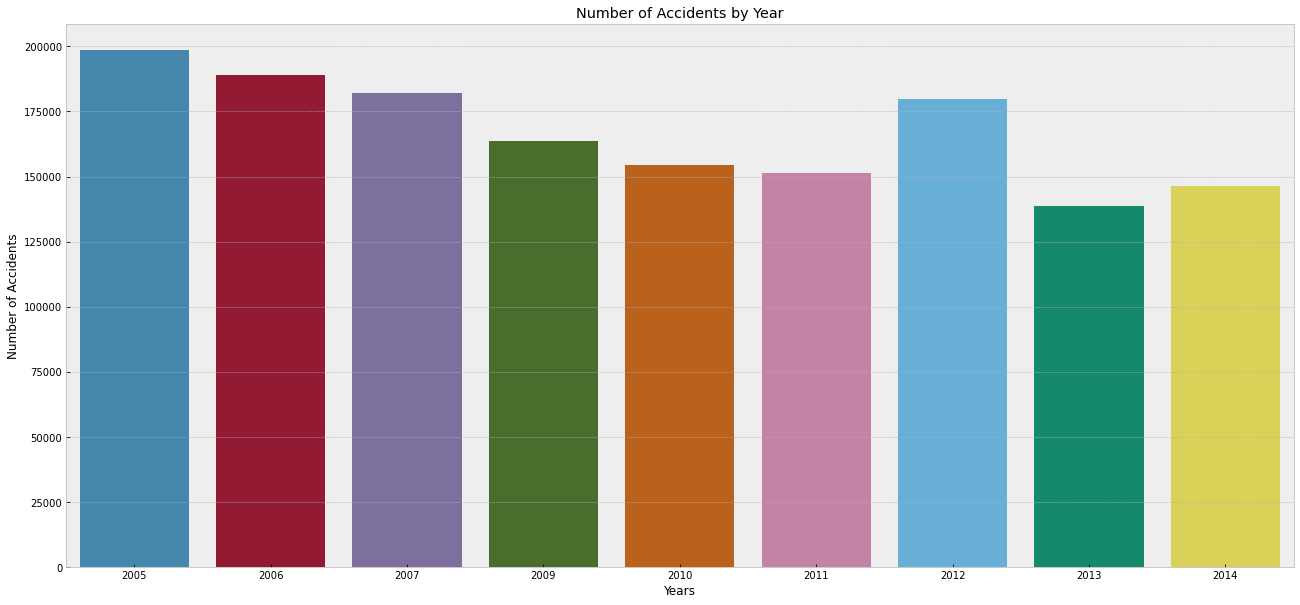

In [73]:
plt.figure(figsize=(22,10))
sns.countplot(x="Year",data=all_accidents)
plt.title("Number of Accidents by Year")
plt.xlabel("Years")
plt.ylabel("Number of Accidents")

Zaman içinde kaza oranlarını tahmin edebilir miyiz?


In [74]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [75]:
num_of_casualties = all_accidents["Number_of_Casualties"].values
category = []
for num in num_of_casualties:
    if num == 1:
        category.append("1 casualty")
    elif num > 1 and num < 3 :
        category.append("between 1 and 3")
    elif num > 3 and num < 6 :
        category.append("between 3 and 6")
    elif num > 6 and num < 9 :
        category.append("between 6 and 9")
    elif num > 9 and num < 12 :
        category.append("between 9 and 12")
    else:
        category.append("more than 12")
category = pd.DataFrame(data=category, columns=["Category"])
all_accidents = all_accidents.reset_index(drop=True)
all_accidents = pd.concat([all_accidents, category], axis=1)
all_accidents.drop(columns="Number_of_Casualties", axis=1, inplace=True)